In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
response=requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=c3cb0630-0650-46c1-a068-82d575c094b2&limit=4633")

# We will build our dataframe based on our paramaters

In [3]:
identity=[]
protein=[]
name=[]
total_fat=[]
total_sugars=[]
vitamin_a=[]
vitamin_b12=[]
vitamin_b6=[]
vitamin_c=[]
vitamin_e=[]
vitamin_k=[]
calories=[]

In [4]:
for data in response.json()['result']['records']:
    identity.append(data["_id"])
    protein.append(data["protein"])
    name.append(data["shmmitzrach"])
    total_fat.append(data["total_fat"])
    total_sugars.append(data["total_sugars"])
    vitamin_a.append(data["vitamin_a_iu"])
    vitamin_b12.append(data["vitamin_b12"])
    vitamin_b6.append(data["vitamin_b6"])
    vitamin_c.append(data["vitamin_c"])
    vitamin_e.append(data["vitamin_e"])
    vitamin_k.append(data["vitamin_k"])
    calories.append(data["food_energy"])

In [5]:
newDataFrame=pd.DataFrame({'name':name,'identity':identity,'protein':protein,'total_fat':total_fat,'total_sugars':total_sugars,
                          'vitamin_a':vitamin_a,'vitamin_b12':vitamin_b12,'vitamin_b6':vitamin_b6,'vitamin_c':vitamin_c,'vitamin_e':vitamin_e,
                          'vitamin_k':vitamin_k,'calories':calories})
newDataFrame

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,חלב אם,3,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42
...,...,...,...,...,...,...,...,...,...,...,...,...
4628,"טופו במרקם רך, מועשר בסידן, משק ווילר",4629,14.4,7.4,0.0,140.9,0.00,0.02,0.2,NaN,NaN,130
4629,"טופו משי, ללא גלוטן, במרקם קשה, Silken firm",4630,6.9,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,62
4630,"טופו משי,קל, ללא גלוטן, במרקם קשה, Silken lite...",4631,6.3,0.8,0.5,0.0,0.00,0.00,0.0,NaN,NaN,37
4631,"טופו משי, ללא גלוטן, במרקם רך, Silken soft",4632,4.8,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,55


## After we have ready data set let's take a quick glance at our dataset

In [6]:
newDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4633 non-null   object 
 1   identity      4633 non-null   int64  
 2   protein       4633 non-null   float64
 3   total_fat     4633 non-null   float64
 4   total_sugars  4243 non-null   float64
 5   vitamin_a     2640 non-null   float64
 6   vitamin_b12   4219 non-null   float64
 7   vitamin_b6    4237 non-null   float64
 8   vitamin_c     4231 non-null   float64
 9   vitamin_e     3982 non-null   float64
 10  vitamin_k     3704 non-null   float64
 11  calories      4633 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 434.5+ KB


In [7]:
newDataFrame.head()

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,חלב אם,3,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42


## We will drop the "name" column as well as  "identity"  because they are irrelevant

In [8]:
DataFrame=newDataFrame.drop(['name','identity'],axis='columns')

In [9]:
DataFrame.head(5)

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
0,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,24
1,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,112
2,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,70
3,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,60
4,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,42


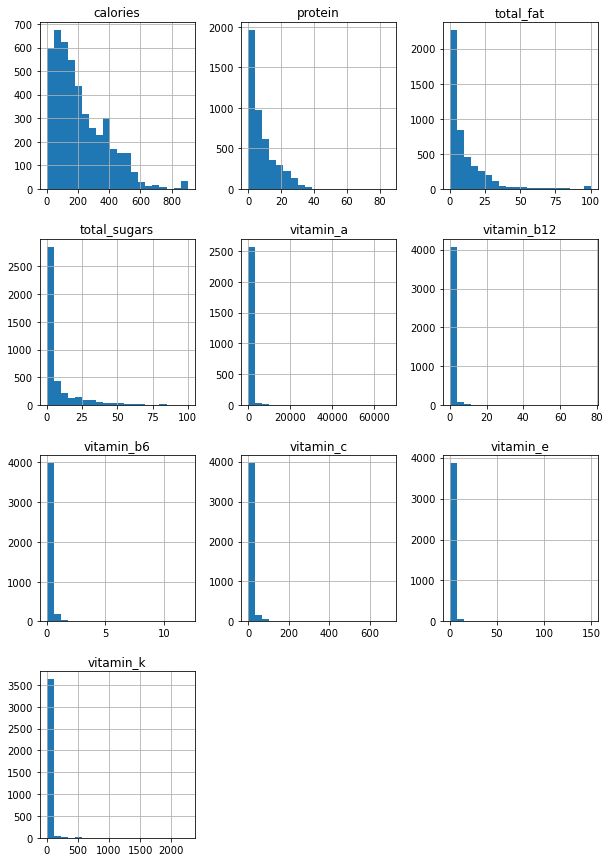

In [10]:
DataFrame.hist(bins=20, figsize=(10,15))
plt.show()

In [11]:
DataFrame.describe()

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
count,4633.000000,4633.000000,4243.000000,2640.000000,4219.000000,4237.000000,4231.000000,3982.000000,3704.000000,4633.000000
mean,8.404446,10.040471,8.709922,469.589015,0.730574,0.197996,8.637060,1.353039,18.579341,213.871358
std,8.822852,14.156297,15.292708,2736.777202,3.393107,0.374223,25.546128,3.880564,83.001037,166.370414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000,1.000000,0.600000,0.000000,0.000000,0.050000,0.000000,0.200000,0.700000,82.000000
50%,5.700000,5.000000,2.500000,16.800000,0.060000,0.110000,1.000000,0.600000,3.900000,169.000000
75%,12.000000,13.900000,8.600000,155.350000,0.450000,0.230000,7.400000,1.300000,13.160000,320.000000
max,85.600000,100.000000,99.800000,66989.000000,76.500000,12.000000,694.000000,149.400000,2262.800000,902.000000


## As we can see there are a lot of null values in our dataset, but before we take care of that we need to split our dataset into training and testing set :

In [12]:
train_set, test_set = train_test_split(DataFrame, test_size=0.2, random_state=42)

### We are going to leave the test set aside, and take a loot at our train set:

# Checking for correlations in our train set:

In [13]:
corr_matrix = train_set.corr()
corr_matrix["calories"].sort_values(ascending=False)

calories        1.000000
total_fat       0.810866
vitamin_e       0.375924
total_sugars    0.369364
protein         0.213920
vitamin_b6      0.108598
vitamin_b12     0.031790
vitamin_a      -0.005059
vitamin_k      -0.023830
vitamin_c      -0.094557
Name: calories, dtype: float64

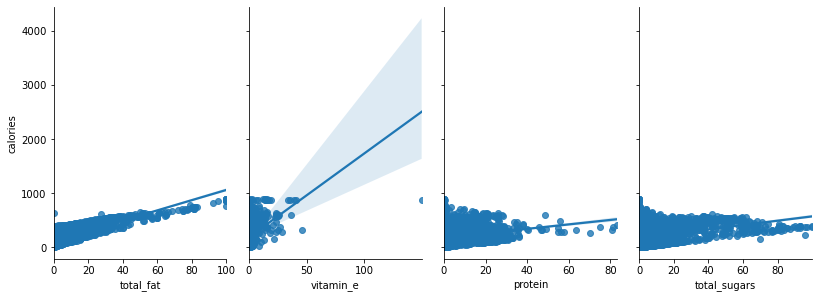

In [14]:
sns.pairplot(train_set,x_vars=['total_fat','vitamin_e','protein','total_sugars'], y_vars='calories', 
             height=4, aspect = 0.7, kind='reg',dropna=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225CEC31220>,
      dtype=object)

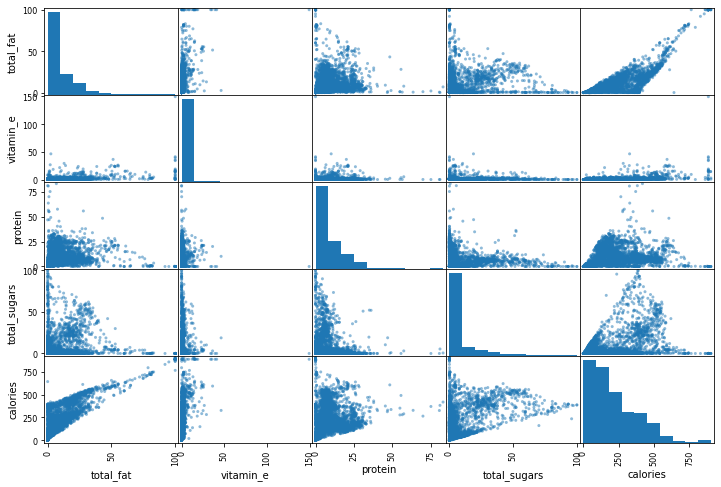

In [15]:
attributes = ['total_fat','vitamin_e','protein','total_sugars','calories']
scatter_matrix(train_set[attributes], figsize=(12, 8))

## From looking at our correlations, we can see a strong correlation between the total fat and the calories:

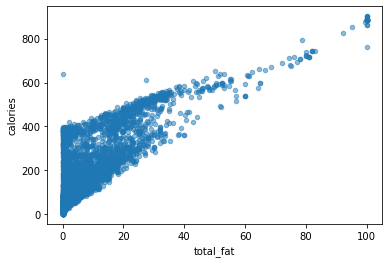

In [16]:
train_set.plot(kind="scatter", x="total_fat", y="calories",
 alpha=0.5)

## Now let's prepare the data for our learning algorithm:

### Let's check the state of our training set:

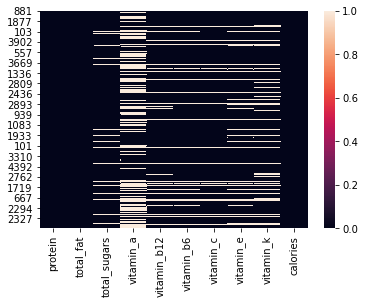

In [17]:
sns.heatmap(train_set.isnull())

## As we can see there are a lot of null values. We will take care of that by filling the values with 0:

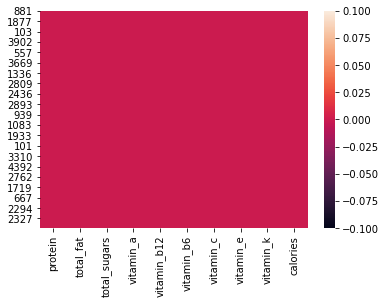

In [18]:
train_set=train_set.fillna(0)
sns.heatmap(train_set.isnull())

## We also know that the vitamins are measured in milligrams, so to get back into grams lets devide the cells by 1000:

In [19]:
attributes=['vitamin_a','vitamin_b12','vitamin_b6','vitamin_c','vitamin_e','vitamin_k']
for i in attributes:
    train_set[i]=train_set[i]/1000

In [20]:
train_set.head()

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
881,18.9,0.9,0.0,0.0000,0.00142,0.00012,0.0000,0.0010,0.00000,88
1501,5.2,32.2,34.3,0.0000,0.00007,0.00012,0.0005,0.0003,0.00140,531
1204,8.3,1.7,1.1,0.0000,0.00000,0.00007,0.0000,0.0001,0.00084,264
2223,4.8,1.4,0.5,9.0011,0.00000,0.00028,0.0361,0.0001,0.00052,62
4018,1.5,1.4,3.1,0.0000,0.00000,0.00020,0.0211,0.0003,0.00587,31


# Our data is scaled and filled, it is ready for our learning algorithm:

## Because we need to predict a value, we need to use a regression algorithm:

In [21]:
nutrition = train_set.drop("calories", axis=1)
nutrition_lables=train_set["calories"].copy()

In [22]:
lin_reg=LinearRegression()
lin_reg.fit(nutrition,nutrition_lables)

LinearRegression()

## Prediction vs Real

### Prediction:

In [23]:
predictions=lin_reg.predict(nutrition)

In [24]:
predictions

array([134.12554435, 499.51333396, 110.77112848, ..., 163.11612018,
       198.59018884, 188.03008381])

### Real:

In [25]:
np.array(nutrition_lables)

array([ 88, 531, 264, ..., 315, 140, 114], dtype=int64)

In [26]:
scores=r2_score(nutrition_lables,predictions)
scores

0.7846064067133084

## We can see that the R^2 is 0.78 which is okay, let's see if we can improve our model using cross validation ParamGridCV

In [27]:
scores_arr = cross_val_score(lin_reg, nutrition,nutrition_lables,
 scoring="r2", cv=10)
scores_arr.mean()

0.7813207920921588

In [28]:
param_grid = [
 {'fit_intercept': [True,False], 'normalize': [True,False],
 'copy_X': [True,False], 'n_jobs':[0,5,10,100,1000]},
 ]
new_lin_reg=LinearRegression()
grid_search=GridSearchCV(new_lin_reg,param_grid,cv=10,scoring='r2',return_train_score=True)
grid_search.fit(nutrition,nutrition_lables)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'n_jobs': [0, 5, 10, 100, 1000],
                          'normalize': [True, False]}],
             return_train_score=True, scoring='r2')

In [29]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}

In [30]:
grid_search.best_estimator_

LinearRegression(n_jobs=0, normalize=True)

In [31]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': False}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'normalize': True}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'normalize': False}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': True}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': False}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 100, 'normalize': True}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 100, 'normalize': False}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1000, 'normalize': True}
0.7813207920921588 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1000, 'normalize': False}
0.7358242670182602 {'copy_X': True, 'fit_intercept': False, 'n_jobs': 0, 

## Our model seems to be performing worse after using cross validation, let's try a different model:

In [32]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(nutrition,nutrition_lables)

DecisionTreeRegressor()

In [33]:
predictions=tree_reg.predict(nutrition)

In [34]:
predictions

array([ 88., 531., 264., ..., 315., 140., 114.])

In [35]:
np.array(nutrition_lables)

array([ 88, 531, 264, ..., 315, 140, 114], dtype=int64)

In [36]:
scores=r2_score(nutrition_lables,predictions)
scores

0.9880783458873601

## Using Cross-Validation on the decision tree:

In [37]:
scores_arr = cross_val_score(tree_reg, nutrition,nutrition_lables,
 scoring="r2", cv=10)
scores_arr.mean()

0.8334488237368965

## Fine tuning our model again using grid search:


In [38]:
param_grid = [
 {'splitter': ['best','random'],'min_samples_split': [2,3,4,5],
 'min_samples_leaf': [1,2,3,4,5],'max_features':[1,2,3,4,5,6,7,8,9]},
 ]
new_tree_reg=DecisionTreeRegressor()
grid_search=GridSearchCV(new_tree_reg,param_grid,cv=5,scoring='r2',return_train_score=True)
grid_search.fit(nutrition,nutrition_lables)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_leaf': [1, 2, 3, 4, 5],
                          'min_samples_split': [2, 3, 4, 5],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='r2')

In [39]:
grid_search.best_params_

{'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'splitter': 'best'}

In [40]:
grid_search.best_score_

0.8648296343462155

## Trying it out with knn regressor:

In [41]:
knn=KNeighborsRegressor()
knn.fit(nutrition,nutrition_lables)

KNeighborsRegressor()

In [42]:
predictions=knn.predict(nutrition)
predictions

array([ 89. , 517.2, 209.2, ..., 188.6, 137.6, 112.6])

In [43]:
np.array(nutrition_lables)

array([ 88, 531, 264, ..., 315, 140, 114], dtype=int64)

In [44]:
param_grid = [
 {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15,17,17,18,19,20],'weights':['uniform','distance'],'p':[1]},
 ]
new_knn=KNeighborsRegressor()
grid_search=GridSearchCV(new_knn,param_grid,cv=10,scoring='r2',return_train_score=True)
grid_search.fit(nutrition,nutrition_lables)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          17, 17, 18, 19, 20],
                          'p': [1], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='r2')

In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8528106605501959 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.8566694662464116 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.8536248647801118 {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
0.8583377110231847 {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.8596536386896576 {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.8643896198916913 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.8636747463860294 {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
0.8685044900228936 {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.8637267103274271 {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.8693272637885372 {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.8632489724698335 {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.8693671453592641 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.8632724433352532 {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8694813532430663 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
0.8633942089478426 {'n_neighbors': 12

In [46]:
grid_search.best_score_

0.8712743834002825

In [47]:
grid_search.best_params_

{'n_neighbors': 18, 'p': 1, 'weights': 'distance'}

## Choosing the final model - the KNN-Regressor

In [48]:
final_model=grid_search.best_estimator_
final_model

KNeighborsRegressor(n_neighbors=18, p=1, weights='distance')

## Fixing the null values in the test set and scale the values

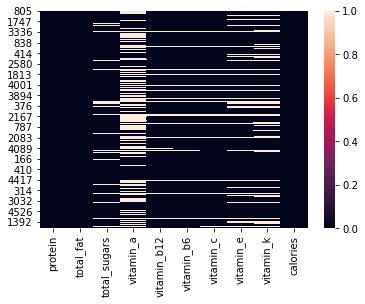

In [49]:
sns.heatmap(test_set.isnull())

In [50]:
test_set=test_set.fillna(0)

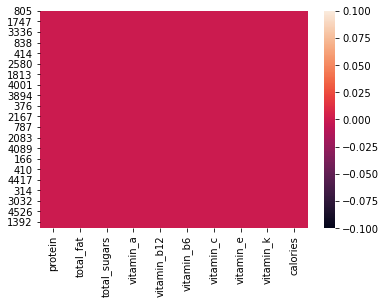

In [51]:
sns.heatmap(test_set.isnull())

In [52]:
attributes=['vitamin_a','vitamin_b12','vitamin_b6','vitamin_c','vitamin_e','vitamin_k']
for i in attributes:
    test_set[i]=test_set[i]/1000

In [53]:
X_test = test_set.drop("calories", axis=1)
y_test = test_set["calories"].copy()
final_predictions = final_model.predict(X_test)
final_r2=r2_score(y_test,final_predictions)
final_r2

0.8600341939323458

# Comparing our model with a zero trust security model:

#### Let's say that the model will always "predict" the most frequent value of calories:

## Lets check the score of the model:

In [54]:
from sklearn.dummy import DummyClassifier

In [55]:
dummy_clf=DummyClassifier(strategy="most_frequent")

In [56]:
dummy_clf.fit(nutrition,nutrition_lables)
predicts=dummy_clf.predict(nutrition)

In [57]:
r2_score(nutrition_lables,predicts)

-0.7572508133134106

## The dummy model does not follow the trend of the data, therefore our model is better than this model